In [2]:
#Comper Between Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Avishag\OneDrive\songs_data.csv")
df.head()

,Unnamed: 0,id,class,label,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,1,Angry,1,angry (1).mp3,117.453835,150774,1396.055556,0.495345,0.284957,...,0.003717,-0.000092,0.319862,0.102312,-0.001473,0.090975,0.008277,10.173823,6.816575,46.465690
1,2,2,Angry,1,angry (10).mp3,107.666016,137825,1288.084112,0.341892,0.299546,...,0.002319,-0.000001,0.128657,0.016553,-0.000005,0.098791,0.009760,3.190422,2.107617,4.442051
2,3,3,Angry,1,angry (11).mp3,129.199219,166026,1317.666667,0.363560,0.309693,...,0.005790,-0.000009,0.222267,0.049403,-0.000141,0.117890,0.013898,3.524789,1.455182,2.117554
3,4,4,Angry,1,angry (12).mp3,123.046875,154017,1272.867769,0.366583,0.308049,...,0.007420,-0.000025,0.162104,0.026278,-0.000199,0.171905,0.029551,3.117279,1.444570,2.086782
4,5,5,Angry,1,angry (13).mp3,117.453835,144954,1271.526316,0.393450,0.315378,...,0.004760,-0.000004,0.138120,0.019077,0.000008,0.143627,0.020629,2.145524,0.974586,0.949817


In [3]:
x = df.drop(['id','class','label','song_name','Unnamed: 0'],axis = 1)
y = df['class']

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x)
joblib.dump(ss, 'fitted_scaler.save')
cols = x.columns 
x = pd.DataFrame(ss.transform(x)) 
x.columns = cols
x.head()


,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,chroma_cens_mean,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,-0.301565,-0.048376,0.854805,1.836876,-1.652417,-1.651030,-0.912212,1.108938,1.180379,-1.406929,...,-0.152135,-0.007945,3.288466,4.421394,-2.003127,0.098919,-0.102649,1.183379,2.782614,2.348147
1,-0.707681,-0.422294,-0.005059,-0.108036,-0.087682,-0.104700,0.343889,0.493401,0.485454,0.428108,...,-0.636360,0.035474,-0.546486,-0.599472,-0.040753,0.279189,0.033559,-0.490679,-0.121473,-0.213224
2,0.185775,0.392043,0.230531,0.166587,1.000628,1.016327,0.469968,0.661903,0.672204,0.245275,...,0.566201,0.031818,1.331021,1.323763,-0.222722,0.719722,0.413622,-0.410525,-0.523840,-0.354904
3,-0.069498,0.045269,-0.126240,0.204904,0.824398,0.832265,0.541143,-0.621747,-0.684223,0.874273,...,1.130878,0.024120,0.124343,-0.030114,-0.300212,1.965602,1.851179,-0.508213,-0.530384,-0.356779
4,-0.301565,-0.216436,-0.136923,0.545425,1.610388,1.660739,0.446480,0.633503,0.640544,0.262837,...,0.209306,0.034157,-0.356705,-0.451684,-0.023509,1.313359,1.031752,-0.741162,-0.820231,-0.426078


# Decision Tree Classifier

In [5]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# used to ensure that the class proportions in the target variable (usually denoted as y) are maintained in both the training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

model = tree.DecisionTreeClassifier()
param_grid = {'criterion': ['gini','entropy']}
dt = model.fit(X_train,y_train)
dtree_cv = GridSearchCV(model,param_grid,cv= 8)
dtree_cv.fit(X_train,y_train)
dtree_ypred = dtree_cv.predict(x)

In [6]:
pd.crosstab(y,dtree_ypred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Angry,Calm,Happy,Sad,All
True,,,,,
Angry,22,0,5,0,27
Calm,0,75,10,2,87
Happy,3,3,196,3,205
Sad,0,6,1,60,67
All,25,84,212,65,386


Text(50.722222222222214, 0.5, 'truth')

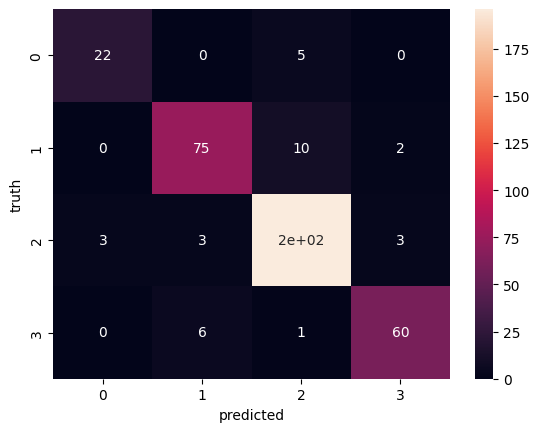

In [8]:
cm = confusion_matrix(y,dtree_ypred)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [7]:
print('Testing Accuracy is',dtree_cv.score(x,y)*100,'%')

Testing Accuracy is 91.45077720207254 %


# K Nearest Neighbors


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [13]:
X = x.loc[:, :]
featureName = list(X)
for name in featureName:
    X[name] = (X[name]-X[name].min())/(X[name].max()-X[name].min())

In [14]:
# Create the KNeighborsClassifier and define the hyperparameter grid
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
print(knn_cv.best_params_)

{'n_neighbors': 22}


In [16]:
knn = KNeighborsClassifier(22)
knn_cv = knn.fit(X,y)

In [17]:
knn_Y_pred = knn_cv.predict(X)
pd.crosstab(y, knn_Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Angry,Calm,Happy,Sad,All
True,,,,,
Angry,1,2,23,1,27
Calm,0,48,16,23,87
Happy,0,18,184,3,205
Sad,0,14,2,51,67
All,1,82,225,78,386


In [18]:
print("Accuracy Score is: ",accuracy_score(y, knn_Y_pred)*100,'%')

Accuracy Score is:  73.57512953367875 %


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 16)
param = {'n_estimators':np.arange(1,20)}
rmodel_cv = GridSearchCV(model1,param,cv=10)
rmodel_cv.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=16),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
rmodel_cv.best_params_

{'n_estimators': 16}

In [21]:
rmodel_cv.best_score_

0.7046558704453442

In [22]:
model1 = RandomForestClassifier(n_estimators = 13)
rmodel = model1.fit(x,y)
ry_pred = rmodel.predict(x)

Text(50.722222222222214, 0.5, 'truth')

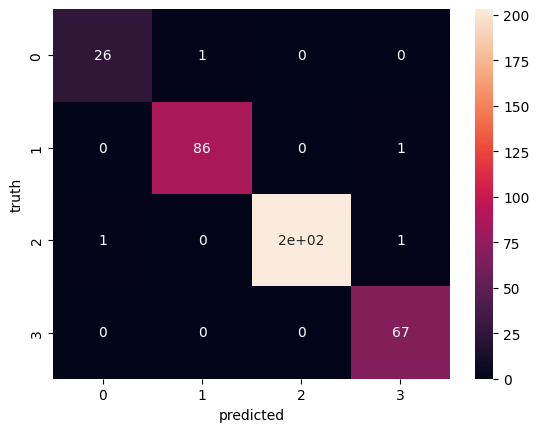

In [24]:
cm = confusion_matrix(y,ry_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [25]:
rY_pred = rmodel_cv.predict(x)
pd.crosstab(y, rY_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Angry,Calm,Happy,Sad,All
True,,,,,
Angry,27,0,0,0,27
Calm,1,86,0,0,87
Happy,1,0,204,0,205
Sad,0,0,0,67,67
All,29,86,204,67,386


In [26]:
from sklearn import metrics 
print("Accuracy Score is: ",metrics.accuracy_score(y, rY_pred)*100,'%')

Accuracy Score is:  99.48186528497409 %


In [27]:
joblib.dump(rmodel, './model.joblib')

['./model.joblib']

# Gaussian Naive Bayes Classifier

In [28]:
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pdz
import matplotlib.pyplot as plt

In [30]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb=gnb.fit(x, y) 

In [31]:
gnby_pred = gnb.predict(x)

In [32]:
pd.crosstab(y, gnby_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Angry,Calm,Happy,Sad,All
True,,,,,
Angry,22,3,1,1,27
Calm,7,44,6,30,87
Happy,51,32,118,4,205
Sad,1,8,1,57,67
All,81,87,126,92,386


In [33]:
print("Accuracy Score is:%",metrics.accuracy_score(y, gnby_pred)*100)

Accuracy Score is:% 62.43523316062176
